In [ ]:
# Load the dataset to check the number of rows and columns
import pandas as pd
data = pd.read_csv('/content/data_file.csv')

# Get the number of rows and columns
rows, columns = data.shape

rows, columns


(62485, 18)

In [ ]:
pip install imbalanced-learn


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/data_file.csv')

# Drop unnecessary columns (FileName, md5Hash)
data_cleaned = df.drop(columns=['FileName', 'md5Hash'])

# Define features (X) and target (y)
X = data_cleaned.drop(columns=['Benign'])
y = data_cleaned['Benign']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the preprocessed training data
X_train_scaled[:5], y_train[:5]


(array([[-4.82992716e-01, -4.46798676e-03, -2.34343697e-03,
         -5.27136389e-02, -5.37395421e-01, -1.84891864e-02,
         -1.40427262e-02,  1.90216257e-03, -5.22743017e-01,
          3.20252128e-01,  1.15987975e-01,  2.71800347e-01,
         -8.24106271e-01, -1.05662995e-02, -1.36549226e-01],
        [-4.82992716e-01, -4.47186273e-03,  8.74140204e-02,
         -5.27136389e-02, -5.37395421e-01, -2.26529317e-02,
         -1.40492895e-02, -1.23797679e-01,  4.15461527e+00,
         -3.90164423e-01, -8.16017637e-01,  2.71800347e-01,
          1.33834768e+00, -1.05450251e-02, -1.36549226e-01],
        [-4.82992716e-01, -4.47186273e-03, -3.90531110e-02,
         -5.27136389e-02, -5.37395421e-01, -2.26529317e-02,
         -1.40492895e-02, -1.23797679e-01,  1.29911629e-01,
         -3.90164423e-01, -8.16017637e-01,  2.71800347e-01,
          1.33834768e+00, -1.05340780e-02, -1.36549226e-01],
        [ 2.06532365e+00, -4.47186273e-03, -7.98535406e-02,
         -5.27136389e-02,  2.18742792

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to X_train and y_train
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [ ]:
!pip install pefile


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/data_file.csv'  # Update this with the actual file path
data = pd.read_csv(file_path)

# Feature extraction function
def feature_extraction(data):
    # Selecting relevant features for ransomware detection
    features = data[['Machine', 'DebugSize', 'NumberOfSections',
                     'SizeOfStackReserve', 'ResourceSize',
                     'BitcoinAddresses']]

    # Add derived features
    features['SizeToSectionRatio'] = features['SizeOfStackReserve'] / (features['NumberOfSections'] + 1)

    # Include the target column ('Benign') for machine learning tasks
    labels = data['Benign']

    return features, labels

# Extract features and labels from the dataset
features, labels = feature_extraction(data)

# Display the extracted features and labels
print("Extracted Features:")
print(features.head())

print("\nLabels:")
print(labels.head())


Extracted Features:
   Machine  DebugSize  NumberOfSections  SizeOfStackReserve  ResourceSize  \
0      332          0                 3             1048576           672   
1    34404         84                 8              262144          1024   
2      332          0                 3             1048576           672   
3    34404         84                 6              262144          1040   
4    34404         84                 7              262144          1096   

   BitcoinAddresses  SizeToSectionRatio  
0                 0       262144.000000  
1                 0        29127.111111  
2                 0       262144.000000  
3                 0        37449.142857  
4                 0        32768.000000  

Labels:
0    1
1    1
2    1
3    1
4    1
Name: Benign, dtype: int64


<ipython-input-6-c935c92346db>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['SizeToSectionRatio'] = features['SizeOfStackReserve'] / (features['NumberOfSections'] + 1)


In [ ]:
# 1.Logistic Regression
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/data_file.csv')

# Set up features and target (assuming 'Benign' is 0 for ransomware and 1 for benign files)
X = df.drop(['FileName', 'md5Hash', 'Benign'], axis=1)  # Exclude non-numeric or irrelevant columns
y = df['Benign']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


Logistic Regression Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7125
           1       0.91      0.78      0.84      5372

    accuracy                           0.87     12497
   macro avg       0.88      0.86      0.87     12497
weighted avg       0.88      0.87      0.87     12497



In [ ]:
#Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Define Decision Tree with max_depth to prevent overfitting
dec_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
dec_tree.fit(X_train, y_train)

# Evaluate with cross-validation
cv_scores = cross_val_score(dec_tree, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Evaluate on the test set
y_pred = dec_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Cross-Validation Accuracy: 97.95%
Test Accuracy: 98.12%


**3.Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Add max_depth, min_samples_split, and reduce number of estimators
rand_forest = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=10, random_state=42)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Load the dataset
df = pd.read_csv('/content/data_file.csv')

# Use a smaller subset of the data to reduce processing time (e.g., 10% of the data)
df_sample = df.sample(frac=0.1, random_state=42)

# Split data
X = df_sample.drop(columns=['Benign', 'FileName', 'md5Hash'])
y = df_sample['Benign']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 150),  # Reduce the range for faster results
    'max_depth': [10, 20, None],  # Limit depth to reduce complexity
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 3)
}

# Randomized search for the best parameters
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Reduce iterations to speed up the process
    cv=2,  # Reducing the number of folds to 2
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Predict using the best model
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 96}
Accuracy: 99.52%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1059
           1       0.99      1.00      0.99       816

    accuracy                           1.00      1875
   macro avg       0.99      1.00      1.00      1875
weighted avg       1.00      1.00      1.00      1875



4.Gradient Boosting (XGBoost)

In [ ]:
import xgboost as xgb

# Add regularization parameters
xgboost = xgb.XGBClassifier(n_estimators=100, max_depth=7, learning_rate=0.1, reg_lambda=1, eval_metric='mlogloss', use_label_encoder=False, random_state=42)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your data (assuming your data has been preprocessed)
# Example: data = pd.read_csv('your_data_file.csv')
df = pd.read_csv('/content/data_file.csv')
# Define features (X) and target (y)
X = df.drop(columns=['Benign', 'FileName', 'md5Hash'])  # Drop non-numeric and target columns
y = df['Benign']  # Assuming 'Benign' is the target column with 0 (malware) and 1 (benign)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler (important for models like SVM, but still good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:14:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 99.62%
Confusion Matrix:
[[7105   20]
 [  27 5345]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       1.00      0.99      1.00      5372

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



**5.Support Vector Machine (SVM)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset and prepare features and target
df = pd.read_csv('/content/data_file.csv')
X, y = df.drop(columns=['FileName', 'md5Hash', 'Benign']), df['Benign']

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = StandardScaler().fit_transform(X_train), StandardScaler().fit_transform(X_test)

# Train and predict using SVM
svm_model = SVC(kernel='linear').fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Output accuracy and evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 85.84%
[[6866  259]
 [1510 3862]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7125
           1       0.94      0.72      0.81      5372

    accuracy                           0.86     12497
   macro avg       0.88      0.84      0.85     12497
weighted avg       0.87      0.86      0.85     12497



**6.NAIVE BAYES**

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/data_file.csv')

# Set up features and target (assuming 'Benign' is 0 for ransomware and 1 for benign files)
X = df.drop(['FileName', 'md5Hash', 'Benign'], axis=1)  # Exclude non-numeric or irrelevant columns
y = df['Benign']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Naive Bayes Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


Naive Bayes Accuracy: 0.49
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.10      0.18      7125
           1       0.46      1.00      0.63      5372

    accuracy                           0.49     12497
   macro avg       0.72      0.55      0.40     12497
weighted avg       0.76      0.49      0.37     12497



**7.LIGHTBGM**

In [ ]:
!pip install dask[dataframe]


INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 3.3 MB/s eta 0:00:00


In [ ]:
from lightgbm import LGBMClassifier

# Add regularization parameters
light_gbm = LGBMClassifier(n_estimators=100, max_depth=7, learning_rate=0.1, reg_lambda=1, random_state=42)


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/data_file.csv')

# Selecting features and target
X = df.drop(columns=['FileName', 'md5Hash', 'Benign'])  # Exclude non-numeric or irrelevant columns
y = df['Benign']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"LightGBM Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


[LightGBM] [Info] Number of positive: 21746, number of negative: 28242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 49988, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.435024 -> initscore=-0.261380
[LightGBM] [Info] Start training from score -0.261380
LightGBM Accuracy: 99.62%
Confusion Matrix:
[[7104   21]
 [  27 5345]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       1.00      0.99      1.00      5372

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



**8.KNN**

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/data_file.csv')

# Set up features and target (assuming 'Benign' is 0 for ransomware and 1 for benign files)
X = df.drop(['FileName', 'md5Hash', 'Benign'], axis=1)  # Exclude non-numeric or irrelevant columns
y = df['Benign']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the K-Nearest Neighbors model (kNN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' to try different values
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f'kNN Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


kNN Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7125
           1       0.99      0.99      0.99      5372

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



9.**ANN**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
df = pd.read_csv('/content/data_file.csv')

# Split into features (X) and target (y)
X = df.drop(columns=['Benign', 'FileName', 'md5Hash']).values  # Drop non-numeric and target columns
y = df['Benign'].values  # Assuming 'Benign' is the target column with 0 (malware) and 1 (benign)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an ANN model
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
ann.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ann.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for the model using the CSV file: {accuracy * 100:.2f}%")

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy for the model using the CSV file: 98.66%
Confusion Matrix:
[[7029   96]
 [  71 5301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7125
           1       0.98      0.99      0.98      5372

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



**8. Autoencoders**

In [ ]:
# Install necessary libraries
!pip install tensorflow

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Load data
data = pd.read_csv('/content/data_file.csv')

# Selecting only numerical columns
numerical_columns = data.select_dtypes(include=['int64']).columns.tolist()
X = data[numerical_columns]

# Splitting the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Normalizing the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define input dimension
input_dim = X_train_scaled.shape[1]

# Model structure
input_img = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_img)
encoded = BatchNormalization()(encoded)
decoded = Dense(input_dim)(encoded)

# Autoencoder and Encoder-Decoder Models
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(16,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Autoencoder
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test_scaled, X_test_scaled),
                          callbacks=[early_stopping])

# Evaluate reconstruction loss
reconstruction_loss = autoencoder.evaluate(X_test_scaled, X_test_scaled)
print("Reconstruction Loss:", reconstruction_loss)


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3446 - val_loss: 0.0223
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0179 - val_loss: 0.0130
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - val_loss: 0.0044
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013 - val_loss: 9.6102e-04
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011 - val_loss: 7.8572e-04
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7928e-04 - val_loss: 6.6911e-04
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0927e-04 - val_loss: 5.7806e-04
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5693e-04 - val_loss: 5.1057e-04
Epoch 12/50
196/196 

**Ensemble Learning (Voting Classifier)**

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('rf', rand_forest),
    ('xgb', xgboost),
    ('lgbm', light_gbm),
], voting='soft')


In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from joblib import parallel_backend


# Scale the data for improved convergence
scaler = StandardScaler()
# Replace X_reduced with X
X_scaled = scaler.fit_transform(X)

# Update train-test split with scaled data
# Assuming 'y' is your target variable and it's already defined
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define base models with increased max_iter for Logistic Regression
log_reg = LogisticRegression(max_iter=500, C=0.5)
dec_tree = DecisionTreeClassifier(max_depth=10)
rand_forest = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
xgboost = XGBClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
light_gbm = LGBMClassifier(n_estimators=50, max_depth=10, n_jobs=-1)

# Voting Classifier with updated models and scaling
voting_clf = VotingClassifier(estimators=[
    ('rf', rand_forest),
    ('xgb', xgboost),
    ('lgbm', light_gbm),
    ('lr', log_reg),
    ('dt', dec_tree)
], voting='soft', weights=[2, 3, 3, 1, 1])

# Train Voting Classifier with parallel processing
with parallel_backend('threading'):
    voting_clf.fit(X_train, y_train)

# Evaluate Voting Classifier
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print("Optimized Voting Classifier Accuracy:", voting_accuracy)

# Stacking Classifier with updated models
stacking_clf = StackingClassifier(estimators=[
    ('rf', rand_forest),
    ('xgb', xgboost),
    ('lgbm', light_gbm),
    ('lr', log_reg),
    ('dt', dec_tree)
], final_estimator=LogisticRegression(max_iter=500))

# Train Stacking Classifier
with parallel_backend('threading'):
    stacking_clf.fit(X_train, y_train)

# Evaluate Stacking Classifier
y_pred_stacking = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print("Optimized Stacking Classifier Accuracy:", stacking_accuracy)

# Efficiency Summary
print(f"Efficiency Summary:\nVoting Accuracy: {voting_accuracy:.4f}\nStacking Accuracy: {stacking_accuracy:.4f}")

Optimized Voting Classifier Accuracy: 1.0
Optimized Stacking Classifier Accuracy: 1.0
Efficiency Summary:
Voting Accuracy: 1.0000
Stacking Accuracy: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score

# Example for Decision Tree
cv_scores = cross_val_score(dec_tree, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy (Decision Tree): {cv_scores.mean():.4f}")


Cross-Validation Accuracy (Decision Tree): 1.0000



Decision Tree - Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7073
           1       1.00      1.00      1.00      5424

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



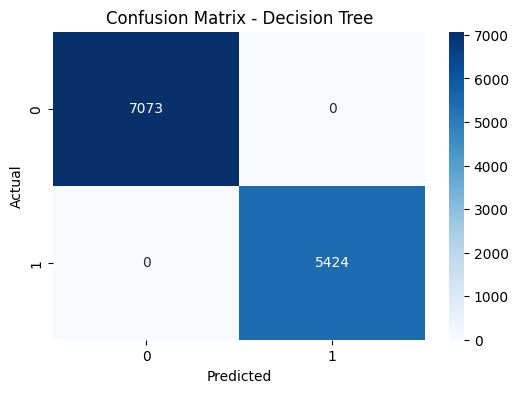


Random Forest - Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7073
           1       1.00      1.00      1.00      5424

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



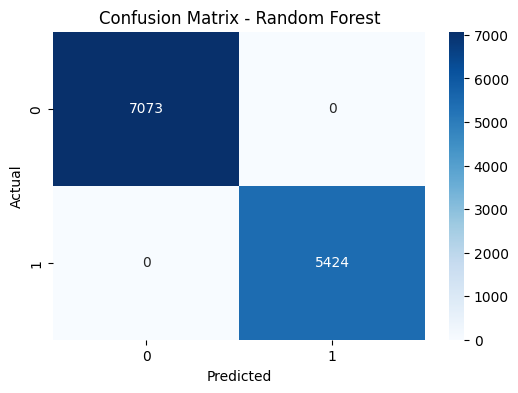

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:53:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7073
           1       1.00      1.00      1.00      5424

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



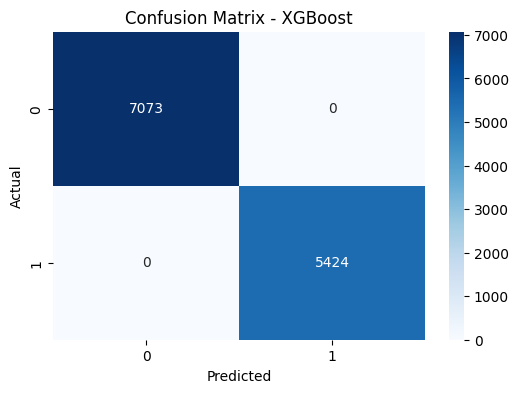

[LightGBM] [Info] Number of positive: 28294, number of negative: 28294
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2063
[LightGBM] [Info] Number of data points in the train set: 56588, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

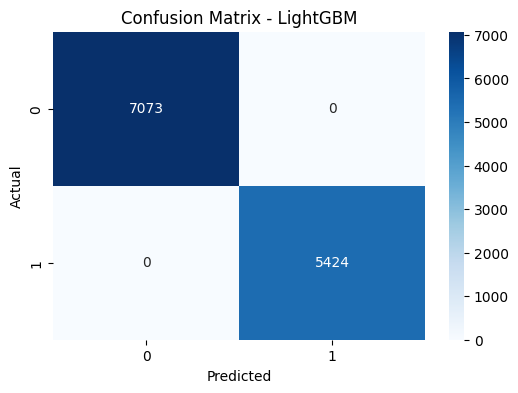

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Train-Test Split (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Decision Tree with constraints
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
evaluate_model("Decision Tree", dt, X_train_balanced, X_test, y_train_balanced, y_test)

# Random Forest with constraints
rf = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
evaluate_model("Random Forest", rf, X_train_balanced, X_test, y_train_balanced, y_test)

# XGBoost
xgb = XGBClassifier(max_depth=5, eval_metric='logloss', use_label_encoder=False)
evaluate_model("XGBoost", xgb, X_train_balanced, X_test, y_train_balanced, y_test)

# LightGBM
lgb = LGBMClassifier(max_depth=5)
evaluate_model("LightGBM", lgb, X_train_balanced, X_test, y_train_balanced, y_test)


**Compare Model Efficiency**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression - Accuracy: 0.7923
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84      7125
           1       0.87      0.61      0.72      5372

    accuracy                           0.79     12497
   macro avg       0.81      0.77      0.78     12497
weighted avg       0.81      0.79      0.78     12497



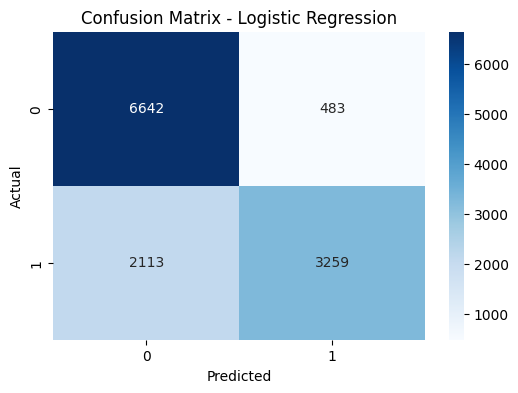


Decision Tree - Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       1.00      1.00      1.00      5372

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



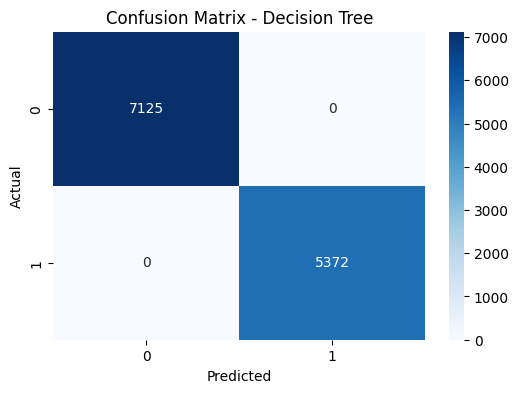


Random Forest - Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       1.00      1.00      1.00      5372

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



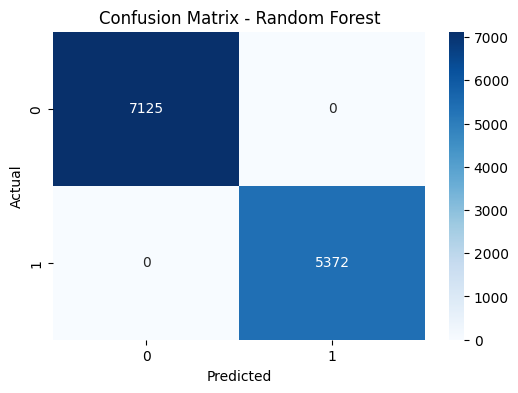

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:54:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       1.00      1.00      1.00      5372

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



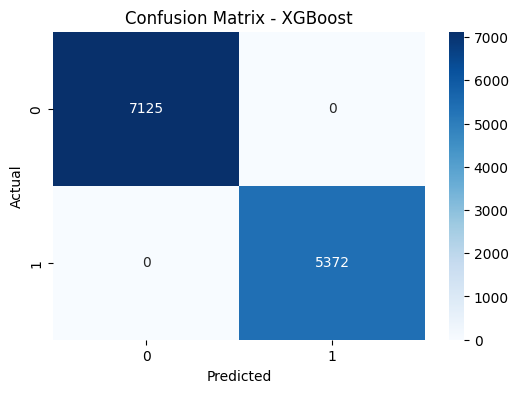

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# Load dataset (replace with your dataset loading logic)
# X, y = load your features and labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "LightGBM": LGBMClassifier()
}

# Initialize results storage
results = []

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    """Train and evaluate a model, returning accuracy and metrics."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({"Model": name, "Accuracy": accuracy})
    print(f"\n{name} - Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate each model
for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)

# Build and evaluate ANN
ann = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, to_categorical(y_train), epochs=50, batch_size=256, verbose=0)
ann_accuracy = ann.evaluate(X_test, to_categorical(y_test), verbose=0)[1]
print(f"\nANN - Accuracy: {ann_accuracy:.4f}")

# Voting Classifier with top models
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)),
        ('lgb', LGBMClassifier())
    ],
    voting='soft'
)
evaluate_model("Voting Classifier", voting_clf, X_train, X_test, y_train, y_test)

# Display final comparison
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nFinal Model Comparison:")
print(results_df)